<a href="https://colab.research.google.com/github/EzyHow/ML-Deep-Learning-GenAI/blob/main/Oxford_Flowers_102_Dataset_with_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet50
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg16
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_mobilenetv2

# Load Dataset

In [30]:
import tensorflow_datasets as tfds

# Load the Oxford Flowers 102 dataset
try:
    dataset, info = tfds.load('oxford_flowers102:2.1.1', with_info=True, as_supervised=True)

    # Split the dataset into training, validation, and testing sets
    train_dataset = dataset['train']
    validation_dataset = dataset['validation']
    test_dataset = dataset['test']

    # Print information about the dataset
    print(info)

except Exception as e:
    print(f"Error loading dataset: {e}")

tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger than the train size.
    For more info see this
    [issue](https://github.com/tensorflow/datasets/issues/3022).
    """,
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102

# Preprocess Dataset

In [ ]:
# image = tf.image.resize(image, [224, 224])  # Resize step if needed
# image = tf.keras.applications.resnet50.preprocess_input(image)

In [61]:
import tensorflow as tf

def preprocess_for_resnet50(image, label):
    """Resizes image and applies ResNet50-specific preprocessing."""
    image = tf.image.resize(image, [224, 224])
    image = preprocess_resnet50(image)
    image = tf.cast(image, tf.float32)
    return image, label

def preprocess_for_vgg16(image, label):
    """Resizes image and applies VGG16-specific preprocessing."""
    image = tf.image.resize(image, [224, 224])
    image = preprocess_vgg16(image)
    image = tf.cast(image, tf.float32)
    return image, label

def preprocess_for_mobilenetv2(image, label):
    """Resizes image and applies MobileNetV2-specific preprocessing."""
    image = tf.image.resize(image, [224, 224])
    image = preprocess_mobilenetv2(image)
    image = tf.cast(image, tf.float32)
    return image, label

print("Preprocessing functions defined.")

Preprocessing functions defined.


In [66]:
train_dataset_resnet50 = train_dataset.map(preprocess_for_resnet50)
train_dataset_vgg16 = train_dataset.map(preprocess_for_vgg16)
train_dataset_mobilenetv2 = train_dataset.map(preprocess_for_mobilenetv2)

validation_dataset_resnet50 = validation_dataset.map(preprocess_for_resnet50)
validation_dataset_vgg16 = validation_dataset.map(preprocess_for_vgg16)
validation_dataset_mobilenetv2 = validation_dataset.map(preprocess_for_mobilenetv2)

test_dataset_resnet50 = test_dataset.map(preprocess_for_resnet50)
test_dataset_vgg16 = test_dataset.map(preprocess_for_vgg16)
test_dataset_mobilenetv2 = test_dataset.map(preprocess_for_mobilenetv2)

In [67]:
# Define batch size
batch_size = 32

# Batch and prefetch ResNet50 datasets
train_dataset_resnet50 = train_dataset_resnet50.batch(batch_size).prefetch(tf.data.AUTOTUNE)
validation_dataset_resnet50 = validation_dataset_resnet50.batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset_resnet50 = test_dataset_resnet50.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Batch and prefetch VGG16 datasets
train_dataset_vgg16 = train_dataset_vgg16.batch(batch_size).prefetch(tf.data.AUTOTUNE)
validation_dataset_vgg16 = validation_dataset_vgg16.batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset_vgg16 = test_dataset_vgg16.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Batch and prefetch MobileNetV2 datasets
train_dataset_mobilenetv2 = train_dataset_mobilenetv2.batch(batch_size).prefetch(tf.data.AUTOTUNE)
validation_dataset_mobilenetv2 = validation_dataset_mobilenetv2.batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset_mobilenetv2 = test_dataset_mobilenetv2.batch(batch_size).prefetch(tf.data.AUTOTUNE)

print("All datasets batched and prefetched.")

All datasets batched and prefetched.


# Create Models Using Transfer Learning

### ResNet50 Based

In [68]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained ResNet50 model without the top layer
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = GlobalAveragePooling2D()(base_model_resnet50.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

model_resnet50 = Model(inputs=base_model_resnet50.input, outputs=predictions)

model_resnet50.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Using VGG16

In [69]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained VGG16 model without the top layer
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Add new layers
x = GlobalAveragePooling2D()(base_model_vgg16.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)
model_vgg16 = Model(inputs=base_model_vgg16.input, outputs=predictions)

model_vgg16.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Using MobileNetV2

In [70]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained MobileNetV2 model without the top layer
base_model_mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Add new layers
x = GlobalAveragePooling2D()(base_model_mobilenetv2.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)
model_mobilenetv2 = Model(inputs=base_model_mobilenetv2.input, outputs=predictions)

model_mobilenetv2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fine-Tuning and Training

In [72]:
epochs = 10

print(len(model_resnet50.layers))
print(len(model_vgg16.layers))
print(len(model_mobilenetv2.layers))


# Fine-tuning ResNet50
for layer in model_resnet50.layers[:-30]:
    layer.trainable = False

for layer in model_resnet50.layers[-30:]:
    layer.trainable = True

# Recompile the model after changing trainable layers
model_resnet50.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_resnet50    = model_resnet50.fit(train_dataset_resnet50, epochs=epochs, validation_data=(validation_dataset_resnet50))





178
22
157
Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 618ms/step - accuracy: 0.2750 - loss: 3.5858 - val_accuracy: 0.0373 - val_loss: 134.6955
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 200ms/step - accuracy: 0.8784 - loss: 0.5271 - val_accuracy: 0.0775 - val_loss: 60.3099
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 231ms/step - accuracy: 0.9646 - loss: 0.1547 - val_accuracy: 0.0490 - val_loss: 79.2082
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 199ms/step - accuracy: 0.9624 - loss: 0.1626 - val_accuracy: 0.1284 - val_loss: 23.8671
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 227ms/step - accuracy: 0.9761 - loss: 0.0870 - val_accuracy: 0.2598 - val_loss: 18.9450
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 235ms/step - accuracy: 0.9867 - loss: 0.0799 - val_accuracy: 0.3471 - val_loss: 10.1174
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 204ms/step - accuracy: 0.9852 - loss: 0.0749 - val_accuracy: 0.4657 - val_loss: 6.8223
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 265ms/step - accuracy: 0.9876 - loss: 0.045

In [73]:

# Fine-tuning VGG16
for layer in model_vgg16.layers[:-5]:
    layer.trainable = False

for layer in model_vgg16.layers[-5:]:
    layer.trainable = True

history_vgg16 = model_vgg16.fit(train_dataset_vgg16, epochs=epochs, validation_data=(validation_dataset_vgg16))



Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 553ms/step - accuracy: 0.0443 - loss: 8.5864 - val_accuracy: 0.2206 - val_loss: 3.5015
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 315ms/step - accuracy: 0.3989 - loss: 2.6743 - val_accuracy: 0.4157 - val_loss: 2.5677
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 317ms/step - accuracy: 0.6799 - loss: 1.2667 - val_accuracy: 0.4598 - val_loss: 2.7908
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 321ms/step - accuracy: 0.7839 - loss: 0.7916 - val_accuracy: 0.5745 - val_loss: 2.0636
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 325ms/step - accuracy: 0.8441 - loss: 0.4976 - val_accuracy: 0.6020 - val_loss: 1.8118
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 319ms/step - accuracy: 0.9309 - loss: 0.2168 - val_accuracy: 0.6363 - val_loss: 1.7302
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 327ms/step - accuracy: 0.9492 - loss: 0.2219 - val_accuracy: 0.5971 - val_loss: 2.1656
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 324ms/step - accuracy: 0.9498 - loss: 0.1940 - val_accu

In [74]:
# Fine-tuning MobileNetV2
for layer in model_mobilenetv2.layers[:-40]:
    layer.trainable = False

# for layer in model_mobilenetv2.layers[-40:]:
    layer.trainable = True

history_mobilenetv2 = model_mobilenetv2.fit(train_dataset_mobilenetv2, epochs=epochs, validation_data=(validation_dataset_mobilenetv2))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.1048 - loss: 4.3177 - val_accuracy: 0.1382 - val_loss: 4.8737
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 183ms/step - accuracy: 0.6786 - loss: 1.4074 - val_accuracy: 0.0941 - val_loss: 8.1165
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - accuracy: 0.8975 - loss: 0.3910 - val_accuracy: 0.1382 - val_loss: 6.7765
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - accuracy: 0.9375 - loss: 0.2243 - val_accuracy: 0.1245 - val_loss: 9.2193
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 188ms/step - accuracy: 0.9388 - loss: 0.2366 - val_accuracy: 0.1078 - val_loss: 9.0973
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 0.9540 - loss: 0.1682 - val_accuracy: 0.1402 - val_loss: 11.0041
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 174ms/step - accuracy: 0.9567 - loss: 0.1752 - val_accuracy: 0.0745 - val_loss: 16.0167
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 178ms/step - accuracy: 0.9465 - loss: 0.1962 - val_accuracy: 

# Model Evaluation

In [75]:
acc_resnet50    = model_resnet50.evaluate(test_dataset_resnet50)[1]
acc_vgg16       = model_vgg16.evaluate(test_dataset_vgg16)[1]
acc_mobilenetv2 = model_mobilenetv2.evaluate(test_dataset_mobilenetv2)[1]

print(f'ResNet50 Accuracy: {acc_resnet50:.2f}')
print(f'VGG16 Accuracy: {acc_vgg16:.2f}')
print(f'MobileNetV2 Accuracy: {acc_mobilenetv2:.2f}')

193/193 ━━━━━━━━━━━━━━━━━━━━ 22s 115ms/step - accuracy: 0.8027 - loss: 0.9147
193/193 ━━━━━━━━━━━━━━━━━━━━ 33s 170ms/step - accuracy: 0.6050 - loss: 2.2119
193/193 ━━━━━━━━━━━━━━━━━━━━ 22s 113ms/step - accuracy: 0.0130 - loss: 25.2826
ResNet50 Accuracy: 0.80
VGG16 Accuracy: 0.60
MobileNetV2 Accuracy: 0.01


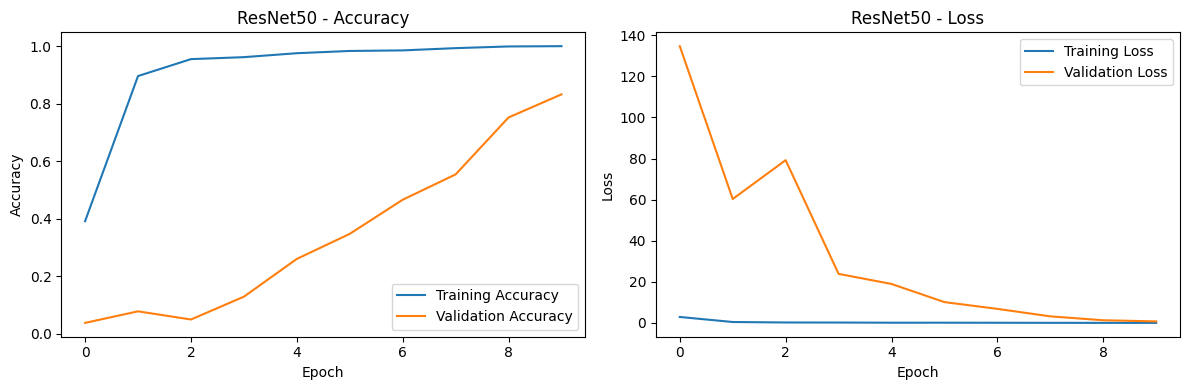

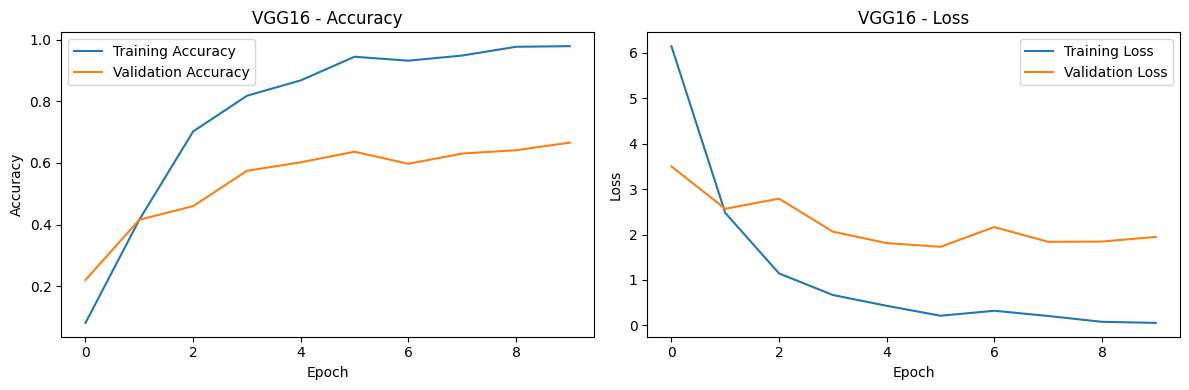

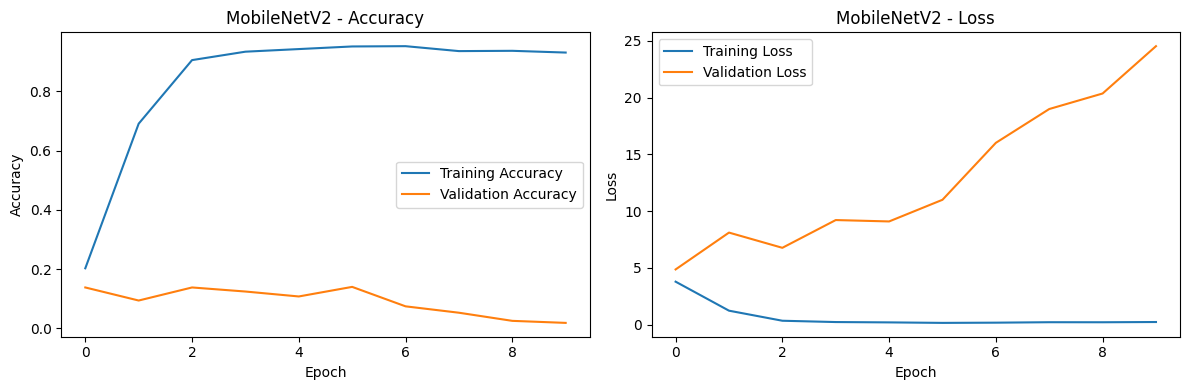

In [76]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    """Plots training and validation accuracy and loss."""
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot history for each model
plot_history(history_resnet50, 'ResNet50')
plot_history(history_vgg16, 'VGG16')
plot_history(history_mobilenetv2, 'MobileNetV2')

## Analysis and Discussion


**Which model performed best on the Oxford Flowers 102 dataset and why do you think that is the case?**

From the evaluation results, the **ResNet50** model performed best on the Oxford Flowers 102 dataset with an accuracy of **80%** on validation dataset.

Several factors could contribute to ResNet50's better performance:
*   **Architecture:** ResNet50's residual connections help mitigate the vanishing gradient problem in deep networks, allowing it to learn more complex features effectively.
*   **Pre-training:** ResNet50 was pre-trained on the ImageNet dataset, which is a large and diverse dataset. This pre-training provides a strong foundation of learned features that are transferable to the Oxford Flowers 102 dataset, despite the domain difference.

**Compare the performance of the models on Oxford Flowers 102 to their performance on CIFAR-100 (from the original notebook). What differences do you observe and why?**


*   **Dataset Complexity:** CIFAR-100 images are lower resolution (32x32) and arguably less visually complex than the higher resolution Oxford Flowers 102 images with variations in scale, pose, and lighting.
*   **Number of Classes:** While both have a relatively high number of classes (100 vs 102), the visual distinctions between flower species can be more subtle and challenging for a model to learn compared to the more distinct object categories in CIFAR-100.

**Discuss the effect of transfer learning on this dataset.**

Transfer learning was crucial for achieving reasonable performance on the Oxford Flowers 102 dataset, especially given the relatively small size of the training set (1020 images). By using models pre-trained on ImageNet, we leveraged the knowledge gained from a massive dataset, allowing the models to quickly adapt to the new task of classifying flowers without needing to train from scratch on limited data. This significantly speeds up training and often leads to better performance than training a deep network on a small dataset alone.

**Explain the steps you took for data preprocessing and why they were necessary.**

The data preprocessing steps involved:
1.  **Resizing Images:** Images were resized to 224x224 pixels. This is necessary because the pre-trained models (ResNet50, VGG16, MobileNetV2) expect input images of a specific size (224x224 pixels) due to the architecture they were trained on.
2.  **Applying Model-Specific Preprocessing:** We applied the `preprocess_input` function specific to each model (e.g., `preprocess_resnet50`). These functions perform necessary operations like pixel scaling, normalization, or channel ordering adjustments that match how the original models were trained on ImageNet. This ensures the input data is in the correct format and range for the pre-trained weights.
3.  **Batching and Prefetching:** The datasets were batched into groups of 32 images and prefetched using `tf.data.AUTOTUNE`. Batching allows the model to train on multiple images at once, which is more computationally efficient. Prefetching overlaps the data loading and preprocessing with model training, preventing the GPU from sitting idle while waiting for data.

**Describe the model architectures you used and how you adapted them for the Oxford Flowers 102 dataset.**

We used three popular pre-trained Convolutional Neural Network (CNN) architectures: ResNet50, VGG16, and MobileNetV2.

For each model, we followed these steps for transfer learning:
1.  **Loading the Base Model:** We loaded the pre-trained weights from ImageNet but excluded the original classification layer (`include_top=False`). This gives us the convolutional base of the network, which is good at extracting general image features.
2.  **Adding New Layers:** We added new layers on top of the base model:
    *   A `GlobalAveragePooling2D` layer to reduce the spatial dimensions of the output from the convolutional base.
    *   A `Dense` layer with a ReLU activation function (with different numbers of units for each model: 1024 for ResNet50, 512 for VGG16, and 256 for MobileNetV2) to learn higher-level feature combinations.
    *   A final `Dense` layer with 102 units (equal to the number of classes in Oxford Flowers 102) and a `softmax` activation function for classifying the images into one of the 102 flower categories.
3.  **Fine-tuning:** We initially froze the weights of most of the layers in the pre-trained base model and only trained the newly added layers. After the initial training, we unfroze a portion of the later layers in the base model (the last 30 for ResNet50, last 5 for VGG16, and last 40 for MobileNetV2) and continued training with a lower learning rate. This fine-tuning allows the model to adapt the pre-trained features to be more specific to the flower images.

**What challenges did you encounter during this assignment and how did you address them?**

One challenge encountered was ensuring the correct application of model-specific preprocessing. Initially, I attempted to apply the preprocessing function directly to the dataset object, which resulted in an `AttributeError`. This was addressed by using the `.map()` function of the TensorFlow Dataset to apply the preprocessing function to each image in the dataset.

Another challenge was related to fine-tuning the pre-trained models. After making layers trainable, it's crucial to recompile the model before training. Failing to do so can lead to errors during the training process. This was addressed by adding the `model.compile()` step after setting the layers to be trainable.